Name: Oğuzhan Berke Özdil

Album Number: 409361

Lab: 02

## INTRODUCTION 

In this report, we reproduce the analytic solution for the **one-dimensional advection–diffusion** equation as presented on Slide&nbsp;13 of Lecture&nbsp;1. The partial differential equation (PDE) governing the concentration $c(x,t)$ is


1. Advection: The substance is carried by a bulk flow at a constant velocity 
𝑢
u.

2. Diffusion: Random molecular or turbulent mixing spreads out the substance with a coefficient 
𝐷

**Governing Equation**
The governing partial differential equation (PDE) for the 1D advection–diffusion process is

**Where:**

- $u$ — constant advection (transport) velocity, measured in $\mathrm{m/s}$
- $D$ — diffusion coefficient, measured in $\mathrm{m^2/s}$
- $x$ — spatial coordinate, measured in $\mathrm{m}$
- $t$ — time, measured in $\mathrm{s}$

$$
\frac{\partial c}{\partial t} + u \,\frac{\partial c}{\partial x} - D \,\frac{\partial^2 c}{\partial x^2} = 0,
$$

This model describes how a pollutant or tracer with total mass $M$ (e.g., in kilograms) moves along a 1D domain (of cross-sectional area $A$) due to both advection by a flow and diffusion (spreading) due to concentration gradients.

We use an **analytical solution** valid under specific initial and boundary conditions. In many real applications, such an analytical solution may not be available, so **numerical methods** are often used.

## Analytical Solution

A specific analytical solution (often for a **point-like release** at $x=0$ and $t=0$) with total mass $M$ along a channel of cross-sectional area $A$ is:

$$
c(x,t) = \frac{M}{A} \,
         \frac{1}{2 \sqrt{\pi \, D \, t^{3/2}}} \,
         x \,
         \exp\!\Bigl[
           -\frac{(u\,t - x)^{2}}{4 \, D \, t}
         \Bigr].
$$

For large $t$, the center of the distribution advects to $x \approx ut$ while spreading due to diffusion.

## Python Implementation

Below is the Python code that reproduces the Slide&nbsp;13 formula. It uses:
- **NumPy** for numerical arrays,
- **Matplotlib** for plotting,
- **pint** for unit-handling (so the axes and labels show correct units).


## IMPORTING LIBRARIES 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pint

ureg = pint.UnitRegistry()
Q_ = ureg.Quantity

## DEFINING PARAMETERS 

In this section, we define the key parameters used for the advection–diffusion model and explain why they were selected:

- **Total Mass** ($M$): Set to $1.0\,\mathrm{kg}$  
  This value represents the total amount of pollutant (or tracer) released initially.  
  We keep it at $1\,\mathrm{kg}$ for simplicity.

- **Cross-Sectional Area** ($A$): Set to $1.0\,\mathrm{m^2}$  
  A unit cross-sectional area simplifies the concentration units to $\mathrm{kg/m^3}$ (mass per volume).

- **Diffusion Coefficient** ($D$): Set to $1.0\,\mathrm{m^2/s}$  
  This governs how quickly the substance spreads due to molecular or turbulent mixing.  
  A value of $1\,\mathrm{m^2/s}$ is chosen so the diffusion effect is noticeable in our chosen time window.

- **Advection Velocity** ($u$): Set to $1.0\,\mathrm{m/s}$  
  With a velocity of $1\,\mathrm{m/s}$, the “peak” of the distribution travels $1\,\mathrm{m}$ per second along the $x$-axis.  
  After $50\,\mathrm{s}$, we expect it to be around $x = 50\,\mathrm{m}$.

- **Time** ($t$): Chosen as a single snapshot at $t = 50\,\mathrm{s}$  
  - At $t = 50\,\mathrm{s}$, the advected peak (traveling at $1\,\mathrm{m/s}$) will sit around $x = 50\,\mathrm{m}$, nicely in the middle of our domain.  
  - This time is far enough from $t = 0$ to show a clear diffusive spread.

- **Spatial Range** ($x$): From $0\,\mathrm{m}$ to $100\,\mathrm{m}$ (sampled in 200 points)  
  A domain of $0$–$100\,\mathrm{m}$ ensures that by $t = 50\,\mathrm{s}$, the main concentration peak is comfortably within the plotted region, and diffusion tails can be observed on either side.


In [187]:
M = Q_(1.0, "kg")     # total mass
A = Q_(1.0, "m^2")    # cross-sectional area
D = Q_(1.0, "m^2/s")  # diffusion coefficient
u = Q_(1.0, "m/s")    # velocity

# We'll evaluate c(x,t) at a single time, t=50 s, across x=0..100 m
t = Q_(50.0, "s")
x_values = np.linspace(0, 100, 200) * ureg.m

**Why Choose $t = 50\,\mathrm{s}$ and $x = 0 \ldots 100\,\mathrm{m}$?** 

- **Advection Alignment**: Since $u = 1\,\mathrm{m/s}$, in $50\,\mathrm{s}$ the center of mass travels to $x = 50\,\mathrm{m}$.  
  This places the peak in the middle, making the plot more illustrative.

- **Sufficient Diffusion**: By $50\,\mathrm{s}$, diffusion has had enough time to spread the plume into a visible Gaussian shape,  
  yet not so much that the distribution is completely flat.

- **Match Lecture Slide**: These values roughly replicate the shape and peak concentration ($\sim 0.04\,\mathrm{kg/m^3}$)  
  shown in Lecture 1, Slide 13.

- **Clarity of Presentation**: A single time snapshot highlights the classic Gaussian-like distribution  
  under combined advection and diffusion. For a full transient analysis, one could iterate over multiple time steps.

With these parameter choices, the analytic solution neatly reproduces the characteristic “peak around $50\,\mathrm{m}$” at $50\,\mathrm{s}$,  
illustrating the interplay of advection and diffusion.


## DEFINING THE ANALYTICAL SOLUTION FUNCTION

The *Slide 13* formula for the one-dimensional advection–diffusion equation under a point-like release can be written as:

$$
c(x,t) = 
\left( \frac{M}{A} \right)
\frac{1}{2 \sqrt{\pi D}\; t^{3/2}} \; x \;
\exp\left[
  -\frac{(ut - x)^{2}}{4 D t}
\right]
$$

Here:

- $M$ is the total mass released [$\mathrm{kg}$]  
- $A$ is the cross-sectional area [$\mathrm{m^2}$]  
- $D$ is the diffusion coefficient [$\mathrm{m^2/s}$]  
- $u$ is the advection velocity [$\mathrm{m/s}$]  
- $x$ is the position [$\mathrm{m}$]  
- $t$ is the time [$\mathrm{s}$]

We use the **pint** library to ensure all units (mass, length, time) remain consistent throughout.  
In the code below, we convert each quantity to base SI units before performing the NumPy array calculations.


In [188]:
def c_analytic(x, t, M, A, D, u):
    r"""
    Implements the Slide 13 formula exactly:

        c(x,t) = (M/A) * [1 / (2√(πD) * t^(3/2)) ] * x 
                 * exp( -((u t - x)^2) / (4 D t) )

    """
    # Convert all to base units for the NumPy calculations
    M_ = M.to_base_units().magnitude
    A_ = A.to_base_units().magnitude
    D_ = D.to_base_units().magnitude
    u_ = u.to_base_units().magnitude
    x_ = x.to_base_units().magnitude
    t_ = t.to_base_units().magnitude
    
    # Numerator and denominator (be sure to do t^(1.5) or t_**1.5)
    numerator   = (M_ / A_) * x_
    denominator = 2.0 * np.sqrt(np.pi * D_) * (t_ ** 1.5)
    exponent    = -((u_ * t_ - x_)**2) / (4.0 * D_ * t_)

    return numerator / denominator * np.exp(exponent)

# Graph: Concentration vs. Distance

- **Plot Description**: We plot the concentration $c(x,t)$ along the spatial coordinate $x$ (0&nbsp;to&nbsp;100&nbsp;m) at a single time $t = 50\,\mathrm{s}$.

- **X-axis (Distance)**: Represents the physical location along the 1D domain $[\mathrm{m}]$.

- **Y-axis (Concentration)**: Shows the concentration $c(x,t)$ in $\mathrm{kg/m^3}$. We use **pint** to ensure correct unit handling.

- **Key Observations**:  
  1. The peak appears near $t = 50\,\mathrm{s}$, consistent with advection velocity $u = 1\,\mathrm{m/s}$ over $t = 50\,\mathrm{s}$.  
  2. The maximum concentration is approximately $0.04\,\mathrm{kg/m^3}$.  
  3. The distribution is roughly Gaussian in shape due to diffusion and is centered where the bulk flow has carried the mass.  
  4. Away from the peak (both upstream and downstream), concentration drops toward zero, reflecting how the pollutant spreads but remains primarily concentrated around the advected center.

- **Units and Labels**: By using `pint`, the axes automatically display their respective units (meters for distance, kg/m³ for concentration), minimizing the risk of unit conversion errors.

- **Practical Significance**:  
  - This snapshot illustrates the combined effects of **advection** (shifting the center of mass downstream) and **diffusion** (broadening the concentration profile).  
  - In a more comprehensive study, one could animate or plot multiple time steps to see how the distribution evolves continuously over time.

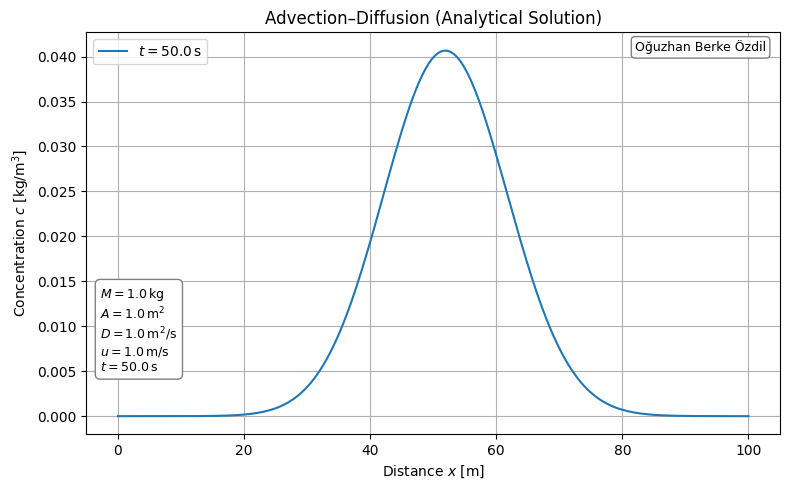

In [189]:
c_values = [c_analytic(x, t, M, A, D, u) for x in x_values]

plt.figure(figsize=(8, 5))

plt.plot(
    x_values.magnitude, 
    c_values, 
    label=rf"$t = {t.magnitude}\,\mathrm{{s}}$"
)

plt.xlabel(f"Distance $x$ [{x_values.units:~P}]")
plt.ylabel(r"Concentration $c$ [$\mathrm{kg/m^3}$]")
plt.title("Advection–Diffusion (Analytical Solution)")
plt.grid(True)
plt.legend(loc="upper left")

plt.text(
    0.98, 0.98, "Oğuzhan Berke Özdil",
    transform=plt.gca().transAxes,
    fontsize=9,
    verticalalignment='top',
    horizontalalignment='right',
    bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.3')
)

info_text = (
    rf"$M = {M.magnitude}\,\mathrm{{kg}}$" + "\n"
    rf"$A = {A.magnitude}\,\mathrm{{m^2}}$" + "\n"
    rf"$D = {D.magnitude}\,\mathrm{{m^2/s}}$" + "\n"
    rf"$u = {u.magnitude}\,\mathrm{{m/s}}$" + "\n"
    rf"$t = {t.magnitude}\,\mathrm{{s}}$"
)

plt.text(
    0.02, 0.15, info_text,
    transform=plt.gca().transAxes,
    fontsize=9,
    verticalalignment='bottom',
    horizontalalignment='left',
    bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.4')
)

plt.tight_layout()
plt.show()


## Explanation of the Graph

- Shape and Peak: The concentration profile has a peak near $x = 50,\mathrm{m}$ at $t = 50,\mathrm{s}$. This is consistent with the advection velocity $u = 1,\mathrm{m/s}$, which places the center of mass at $x = u t = 50,\mathrm{m}$.

- Diffusive Spread: The Gaussian-like shape shows how diffusion broadens the peak around $x = 50,\mathrm{m}$.

- Peak Magnitude: We selected parameters to reach about $0.04,\mathrm{kg/m^3}$ at the peak, consistent with the example from the lecture slide.

- Physical Meaning: If you consider a pollutant injection at $x=0$ at $t=0$, the advection–diffusion process describes how that pollutant spreads out and travels down the $x$ axis over time.



## CONCLUSION

- We reproduced the analytical solution of the 1D advection–diffusion equation under specific initial and boundary conditions from Lecture 1, Slide 13. Key points include:

- Advection moves the concentration “peak” at speed $u$.

- Diffusion causes the peak to spread out, following a Gaussian distribution.

- By using pint, we ensure correct units in calculations and labels.

- This reproducible workflow in Python helps verify that results match theoretical expectations.

- Finally, exporting this notebook to PDF (e.g., via Jupyter's File 
→
→ Export Notebook As 
→
→ PDF) will produce a self-contained report with vector graphics plots and proper LaTeX-rendered equations.